# IMPORTS

In [252]:
%matplotlib inline
import matplotlib.pyplot as plt
from urllib2 import urlopen
from bs4 import BeautifulSoup as bs
from datetime import datetime
import pandas as pd
from paretochart import pareto
import csv

# FUNÇÕES

In [179]:
def coordenadas (localizacao):
    mystring = localizacao.split(',')
    pos_latitude = mystring[0].split(' ')
    pos_longitude = mystring[1].split(' ')
    if pos_latitude[1] == 'N':
        latitude = float(pos_latitude[0])
    else:
        latitude = float(pos_latitude[0]) * -1
        
    if pos_longitude[2] == 'E':
        longitude = float(pos_longitude[1])
    else:
        longitude = float(pos_longitude[1]) * -1
        
    return latitude, longitude

def magicbox(magic_input):
    localizacao = magic_input[0]
    data_hora = datetime.strptime(magic_input[1], '%Y-%m-%d %H:%M:%S')
    magnitude = float(magic_input[2])
    latitude, longitude = coordenadas(magic_input[3])
    profundidade = float(magic_input[4].split(' ')[0])
    
    magic_output = [localizacao,data_hora,magnitude,latitude,longitude,profundidade]
    return magic_output

# SET UP

In [183]:
site = "http://rev.seis.sc.edu/earthquakes.html"
base_url = "http://rev.seis.sc.edu/earthquakes/?eq_url="
page = urlopen(site)

soup = bs(page, "html5lib")
options = soup.findAll("option")
print "Existem ",len(options)," terremotos registrados em rev.seis.sc.edu"

Existem  77  terremotos registrados em rev.seis.sc.edu


# COLETA DE DADOS

In [180]:
earthquakes = []
for option in options[:40]:
    myurl = base_url + option['value']
    soup = bs(urlopen(myurl), "html5lib")
    titems = soup.findAll('a', {'class': 'definition'})
    mylist = [option.find(text=True).split(',')[-2]]
    for i in range (1,5):
        mylist.append(titems[i].parent.findNext().findNext().find(text=True))
    earthquakes.append(magicbox(mylist))

In [249]:
myquakes = earthquakes[1:39]
print "Foram escolhidos os seguintes terremotos(%s):\n" % len(myquakes)
print '%s %28s %14s %15s %17s %10s' % ('Data/hora',"Magnitude",'Latitude','Longitude','Profundidade','Local')
for quake in myquakes:
    for item in quake[1:]:
        print '%15s' % item,
    print "%15s" % quake[0],
    print ''

Foram escolhidos os seguintes terremotos(38):

Data/hora                    Magnitude       Latitude       Longitude      Profundidade      Local
2016-10-21 20:47:39             3.5            36.4           -98.8             5.0        Oklahoma 
2016-10-21 20:26:00             4.0            36.4           -98.8             2.1        Oklahoma 
2016-10-21 19:51:16             4.6            14.4           -91.4            98.0       Guatemala 
2016-10-21 05:07:23             6.6            35.4           133.8             6.4           Japan 
2016-10-21 04:56:47             3.5            67.8          -146.1            10.0          Alaska 
2016-10-20 19:08:09             3.6            59.8          -152.7            87.0          Alaska 
2016-10-20 15:21:16             4.6            17.6           -94.6           139.0          Mexico 
2016-10-20 15:13:14             4.6            14.7           -91.6           105.0       Guatemala 
2016-10-20 13:28:01             3.6           

CÁLCULOS

In [189]:
datas = []
ocorrencias = []
for quake in myquakes:
    data = quake[1].date()
    if not data in datas:
        datas.append(data)
        ocorrencias.append(1)
    else:
        index = datas.index(data)
        ocorrencias[index] += 1

# TERREMOTOS POR DIA

In [190]:
print 'TABELA DE TERREMOTOS POR DIA'
print ''
print '%7s %7s' % ('data','qtd')
for i in range(len(datas)):
    print '%s %3s' % (datas[i], ocorrencias[i])

print ''
print 'media da quantidade de terremotos por dia: ',sum(ocorrencias)/float(len(ocorrencias))
print 'O rol da qtd. terremotos/dia é:'
print sorted(ocorrencias)
print 'onde a mediana é 3 e a moda é 3.'

TABELA DE TERREMOTOS POR DIA

   data     qtd
2016-10-21   5
2016-10-20   6
2016-10-19   3
2016-10-18   4
2016-10-17   3
2016-10-15   2
2016-10-14   1
2016-10-13   3
2016-10-12   2
2016-10-10   3
2016-10-09   4
2016-10-08   2

media da quantidade de terremotos por dia:  3.16666666667
O rol da qtd. terremotos/dia é:
[1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 6]
onde a mediana é 3 e a moda é 3.


MAGNITUDES

In [185]:
magnitudes = [quake[2] for quake in myquakes]
media_mag = sum(magnitudes)/float(len(magnitudes))
print 'a media das magnitudes é ',media_mag
print 'O rol das magnitudes é:\n'
lista_magnitudes = sorted(magnitudes)
for magnitude in lista_magnitudes:
    print magnitude,' ',
mag1 = lista_magnitudes[len(magnitudes)/2]
mag2 = lista_magnitudes[len(magnitudes)/2 - 1]

print '\n\nonde a mediana é %s e a moda é 3.5.' % ((mag1+mag2)/2)

a media das magnitudes é  4.43789473684
O rol das magnitudes é:

3.5   3.5   3.5   3.5   3.5   3.5   3.5   3.6   3.6   3.6   3.6   3.6   3.7   3.7   3.7   3.74   3.8   3.8   3.9   4.0   4.0   4.0   4.1   4.1   4.6   4.6   4.6   5.1   5.5   5.7   5.7   5.8   5.9   6.0   6.2   6.4   6.6   6.9   

onde a mediana é 3.95 e a moda é 3.5.


Gráfico: num. de terremotos/dia X data


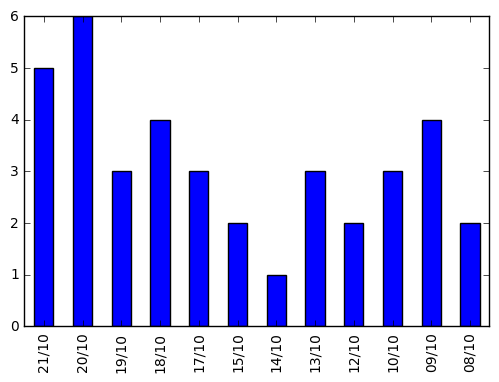

In [193]:
mes_dia = [data.strftime("%d/%m") for data in datas]
ser = pd.Series(ocorrencias, index=mes_dia)
print 'Gráfico: num. de terremotos/dia X data'
ax1 = ser.plot(kind='bar')

Diagrama de Pareto para as quantidades de terremoto por dia
Os dias são todos do mês de outubro de 2016


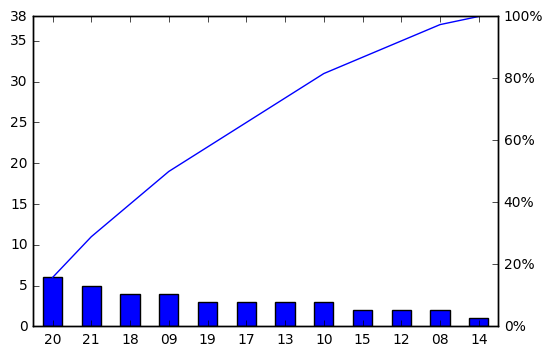

In [194]:
dias = [data.strftime("%d") for data in datas]
print 'Diagrama de Pareto para as quantidades de terremoto por dia'
pareto(ocorrencias,dias,data_kw={'width': 0.5,
    'color': 'b'})
print "Os dias são todos do mês de outubro de 2016"

In [ ]:
outputFile = open('tabela.csv', 'w')
outputWriter = csv.writer(outputFile)
outputWriter.writerow(['LOCAL','DATA','MAGNITUDE','LATITUDE','LONGITUDE','PROFUNDIDADE'])